## **N^2 - 1 Puzzle Problem**
Write a Python/ Java/ C/ C++ program to solve the (n^2 − 1)-puzzle problem using the following search algorithms:
- Breadth-First Search (BFS)
- Depth-First Search (DFS)
- Iterative Deepening (ID)

### 1. Breadth-First Search (BFS)

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action))
    return successors

def get_inversions(state):
    # Flatten state and count inversions
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    # Find blank position from bottom
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    # For odd grid size
    if n % 2 == 1:
        return inversions % 2 == 0
    # For even grid size
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    
    # Create goal position lookup
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    # Calculate total manhattan distance
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def bfs_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    initial = PuzzleState(initial_state)
    queue = deque([(manhattan_distance(initial_state, goal_state), initial)])
    visited = set()
    
    while queue and (time.time() - start_time) < timeout:
        _, current = queue.popleft()
        state_tuple = tuple(map(tuple, current.state))
        
        if current.state == goal_state:
            path = []
            while current.parent:
                path.append(current.action)
                current = current.parent
            return path[::-1], time.time() - start_time
            
        if state_tuple not in visited:
            visited.add(state_tuple)
            for successor in get_successors(current):
                if tuple(map(tuple, successor.state)) not in visited:
                    h = manhattan_distance(successor.state, goal_state)
                    queue.append((h, successor))
    
    return None, time.time() - start_time

def run_bfs_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        solution, solve_time = bfs_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [3, 4]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_bfs_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    
    # Labels and title
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('BFS Performance')
    
    # Set x-ticks to be integers
    plt.xticks(n_values)
    
    # Add value labels on bars
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('bfs_results.png')
    plt.show()

if __name__ == "__main__":
    main()


Testing for n=3

Trial 1/10 for 3x3 puzzle
Solved in 0.79 seconds

Trial 2/10 for 3x3 puzzle
Solved in 0.05 seconds

Trial 3/10 for 3x3 puzzle
Solved in 2.29 seconds

Trial 4/10 for 3x3 puzzle
Solved in 0.88 seconds

Trial 5/10 for 3x3 puzzle
Timeout or no solution

Trial 6/10 for 3x3 puzzle
Timeout or no solution

Trial 7/10 for 3x3 puzzle
Timeout or no solution

Trial 8/10 for 3x3 puzzle
Solved in 2.89 seconds

Trial 9/10 for 3x3 puzzle
Solved in 1.20 seconds

Trial 10/10 for 3x3 puzzle
Timeout or no solution

Results for n=3:
Average time: 1.35 seconds
Standard deviation: 0.96
Successful solves: 6/10

Testing for n=4

Trial 1/10 for 4x4 puzzle
Timeout or no solution

Trial 2/10 for 4x4 puzzle
Timeout or no solution

Trial 3/10 for 4x4 puzzle
Timeout or no solution

Trial 4/10 for 4x4 puzzle
Timeout or no solution

Trial 5/10 for 4x4 puzzle


### 2. Depth-First Search (DFS)

In [2]:
from collections import deque

class PuzzleNode:
    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
    
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
    
    def find_blank(self):
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                if self.state[i][j] == 0:
                    return i, j

def get_successors(node):
    successors = []
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < len(node.state) and 0 <= new_j < len(node.state):
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleNode(new_state, node, action, node.depth + 1))
    return successors

def dfs_solve(initial_state, goal_state, max_depth=1000):
    initial_node = PuzzleNode(initial_state)
    stack = deque([initial_node])
    visited = set()
    
    while stack:
        current = stack.pop()
        state_tuple = tuple(map(tuple, current.state))
        
        if current.depth > max_depth:
            continue
            
        if current.state == goal_state:
            path = []
            while current.parent:
                path.append(current.action)
                current = current.parent
            return path[::-1]
            
        if state_tuple not in visited:
            visited.add(state_tuple)
            stack.extend(get_successors(current))
    
    return None

def main():
    initial_state = [
        [1, 2, 3],
        [4, 0, 6],
        [7, 5, 8]
    ]
    
    goal_state = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ]
    
    print("Initial State:")
    print(PuzzleNode(initial_state))
    print("\nGoal State:")
    print(PuzzleNode(goal_state))
    
    solution = dfs_solve(initial_state, goal_state)
    
    if solution:
        print("\nSolution found!")
        print("Moves:", ' '.join(solution))
    else:
        print("\nNo solution found!")

if __name__ == "__main__":
    main()

Initial State:
1 2 3
4 0 6
7 5 8

Goal State:
1 2 3
4 5 6
7 8 0

Solution found!
Moves: U L D D R U U L D D R U U L D D R U U L D D R U U L D D R R



Testing for n=2
Timeout or no solution
Solved in 0.00 seconds
Timeout or no solution
Timeout or no solution
Timeout or no solution
Timeout or no solution
Solved in 0.00 seconds
Timeout or no solution
Timeout or no solution
Timeout or no solution

Average solving time for n=2: 0.00 seconds

Testing for n=3
Timeout or no solution
Solved in 1.27 seconds
Timeout or no solution
Solved in 1.78 seconds
Solved in 1.49 seconds
Solved in 6.35 seconds
Timeout or no solution
Solved in 1.13 seconds
Timeout or no solution
Solved in 1.60 seconds

Average solving time for n=3: 2.27 seconds


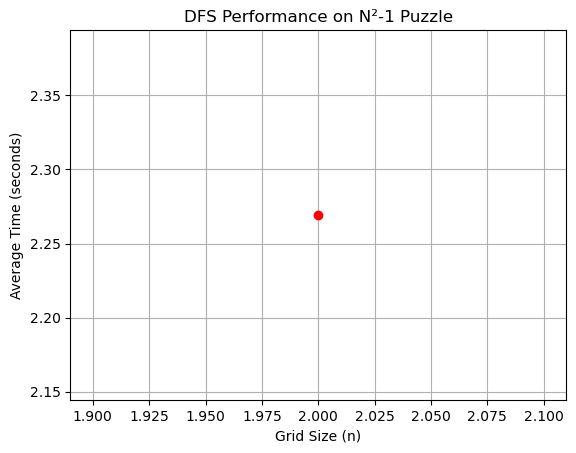

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action, node.depth + 1))
    return successors

def id_solve(initial_state, goal_state, timeout=60):
    start_time = time.time()
    depth = 0
    
    while (time.time() - start_time) < timeout:
        initial = PuzzleState(initial_state)
        result = depth_limited_search(initial, goal_state, depth)
        if result is not None:
            return result, time.time() - start_time
        depth += 1
    
    return None, time.time() - start_time

def depth_limited_search(node, goal_state, depth_limit):
    if node.state == goal_state:
        path = []
        current = node
        while current.parent:
            path.append(current.action)
            current = current.parent
        return path[::-1]
        
    if node.depth >= depth_limit:
        return None
        
    for successor in get_successors(node):
        result = depth_limited_search(successor, goal_state, depth_limit)
        if result is not None:
            return result
            
    return None

def run_id_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        solution, solve_time = id_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_id_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('ID Performance')
    plt.xticks(n_values)
    
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('id_results.png')
    plt.show()

if __name__ == "__main__":
    main()

### 3. Iterative Deepening (ID)

In [5]:
from collections import deque

class PuzzleNode:
    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
    
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
    
    def find_blank(self):
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                if self.state[i][j] == 0:
                    return i, j

def get_successors(node):
    successors = []
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < len(node.state) and 0 <= new_j < len(node.state):
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleNode(new_state, node, action, node.depth + 1))
    return successors

def depth_limited_search(initial_node, goal_state, depth_limit):
    if initial_node.state == goal_state:
        return []
        
    if depth_limit == 0:
        return None
        
    for successor in get_successors(initial_node):
        if successor.depth <= depth_limit:
            result = depth_limited_search(successor, goal_state, depth_limit - 1)
            if result is not None:
                return [successor.action] + result
                
    return None

def iterative_deepening(initial_state, goal_state):
    depth = 0
    while True:
        print(f"Searching depth: {depth}")
        initial_node = PuzzleNode(initial_state)
        result = depth_limited_search(initial_node, goal_state, depth)
        if result is not None:
            return result
        depth += 1

def main():
    initial_state = [
        [1, 2, 3],
        [4, 0, 6],
        [7, 5, 8]
    ]
    
    goal_state = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ]
    
    print("Initial State:")
    print(PuzzleNode(initial_state))
    print("\nGoal State:")
    print(PuzzleNode(goal_state))
    
    solution = iterative_deepening(initial_state, goal_state)
    
    if solution:
        print("\nSolution found!")
        print("Moves:", ' '.join(solution))
    else:
        print("\nNo solution found!")

if __name__ == "__main__":
    main()

Initial State:
1 2 3
4 0 6
7 5 8

Goal State:
1 2 3
4 5 6
7 8 0
Searching depth: 0
Searching depth: 1
Searching depth: 2
Searching depth: 3

Solution found!
Moves: D R


In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)
                   
    def get_path(self):
        path = []
        current = self
        while current.parent:
            path.append(current.action)
            current = current.parent
        return path[::-1]

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action, node.depth + 1))
    return successors

def id_solve(initial_state, goal_state, time_limit=60):
    start_time = time.time()
    depth = 0
    
    while time.time() - start_time < time_limit:
        result = depth_limited_search(initial_state, goal_state, depth, start_time, time_limit)
        if result[0] is not None:
            return result
        depth += 1
    
    return None, time.time() - start_time

def depth_limited_search(initial_state, goal_state, depth_limit, start_time, time_limit):
    initial = PuzzleState(initial_state)
    stack = deque([(initial, 0)])
    visited = set()
    
    while stack and time.time() - start_time < time_limit:
        current, depth = stack.pop()
        state_tuple = tuple(map(tuple, current.state))
        
        if current.state == goal_state:
            return current.get_path(), time.time() - start_time
            
        if depth < depth_limit and state_tuple not in visited:
            visited.add(state_tuple)
            for successor in get_successors(current):
                stack.append((successor, depth + 1))
    
    return None, time.time() - start_time

def run_experiments():
    ns = [3]  # puzzle sizes to test
    algorithms = [
        ("ID", id_solve)
    ]
    results = {name: [] for name, _ in algorithms}
    
    for n in ns:
        goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                     for j in range(n)]
        initial_states = [generate_random_state(n) for _ in range(10)]
        
        for alg_name, alg_func in algorithms:
            times = []
            for init_state in initial_states:
                _, solve_time = alg_func(init_state, goal_state)
                if solve_time < 60:  # only count successful solves
                    times.append(solve_time)
            if times:  # if any successful solves
                results[alg_name].append(sum(times)/len(times))
            else:
                results[alg_name].append(None)
    
    plot_results(ns, results)

def plot_results(ns, results):
    plt.figure(figsize=(10, 6))
    colors = ['b', 'r', 'g']
    markers = ['o', 's', '^']
    
    for (alg_name, _), color, marker in zip(algorithms, colors, markers):
        times = results[alg_name]
        plt.plot(ns, times, f'{color}{marker}-', label=alg_name)
    
    plt.xlabel('Puzzle Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Performance Comparison of Search Algorithms')
    plt.legend()
    plt.grid(True)
    plt.savefig('puzzle_results.png')
    plt.show()

if __name__ == "__main__":
    run_experiments()

KeyboardInterrupt: 